Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.48235294117647054


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.03529411764705881
-0.207843137254902


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.3137254901960784
-0.37254901960784315


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.3058823529411765
-0.4705882352941176


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.3058823529411765
-0.6745098039215687


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.8745098039215686


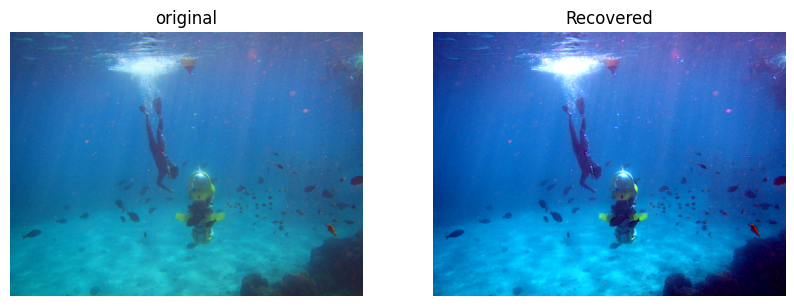

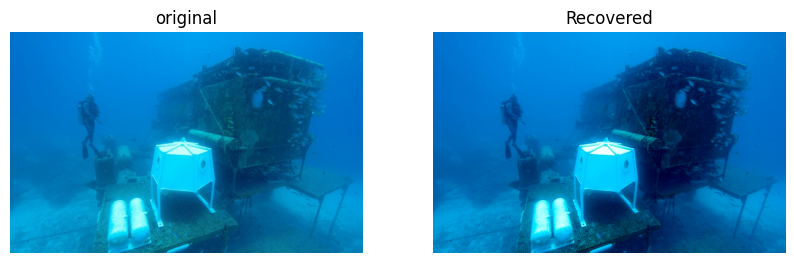

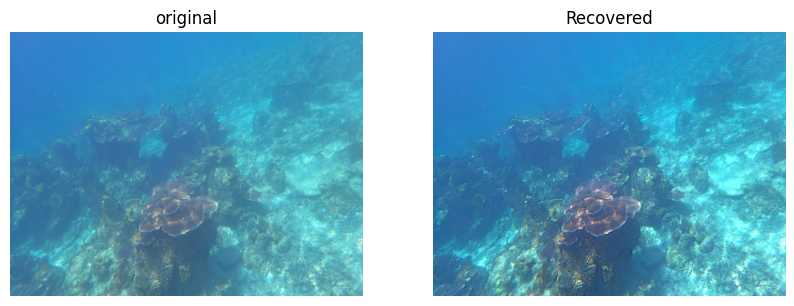

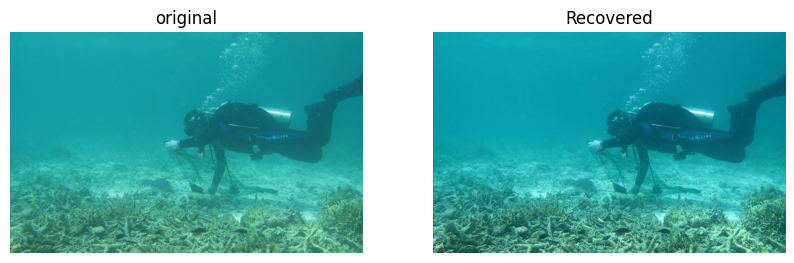

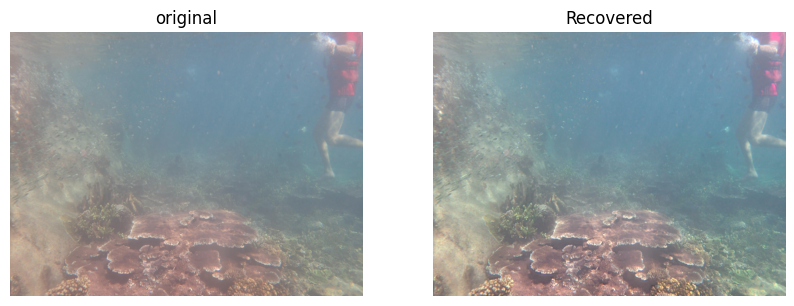

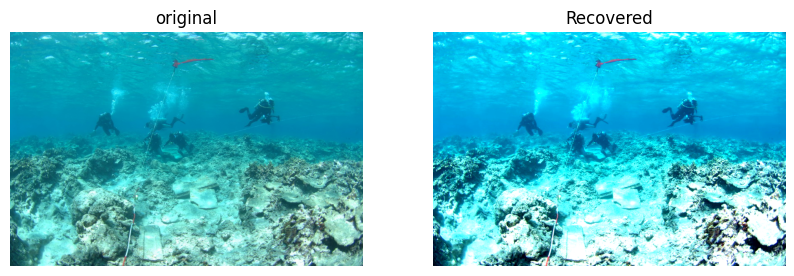

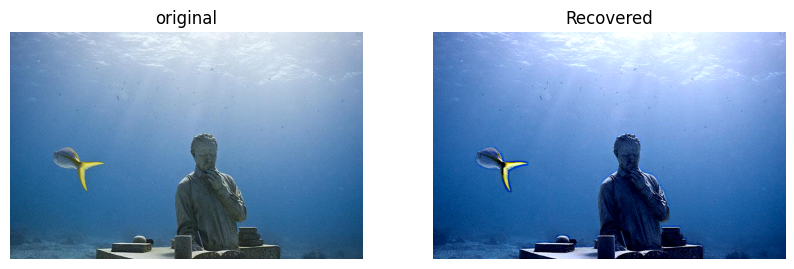

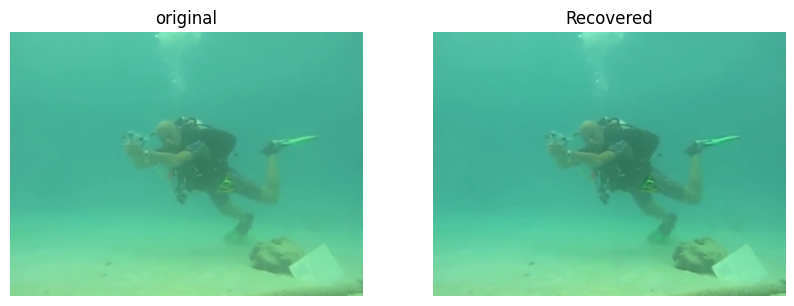

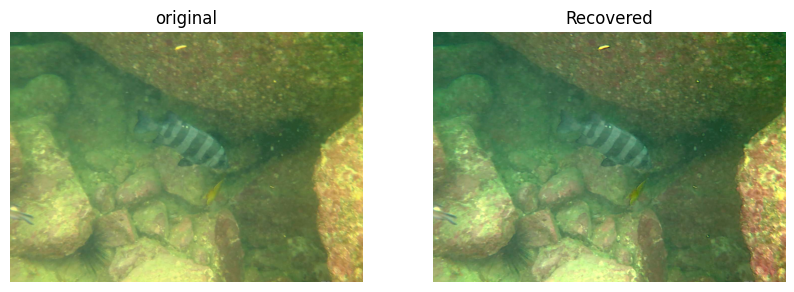

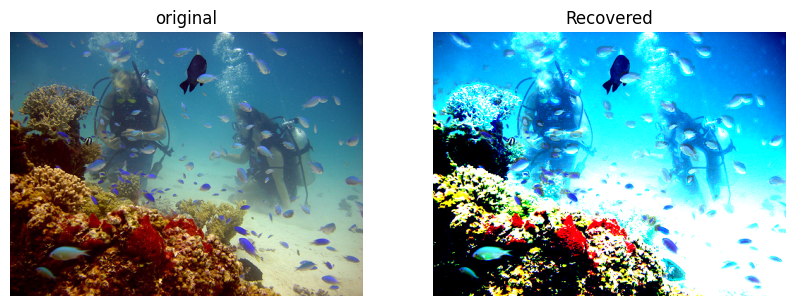

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os

def BL(image, trasmission_map):
    [h, w] = image.shape[:2]
    imsz = h * w
    numpx = int(max(math.floor(imsz / 1000), 1))
    trasmission_vec = trasmission_map.reshape(imsz)
    imvec = image.reshape(imsz, 3)
    indices = trasmission_vec.argsort()
    indices = indices[:numpx]

    atmsum = np.zeros([1, 3])
    for ind in range(1, numpx):
        atmsum = atmsum + imvec[indices[ind]]

    A = atmsum / numpx
    return A


def MIP(image):
    b, g, r = cv2.split(image)
    max_green_blue=cv2.max(b,g)
    kernel = np.ones((7, 7), np.uint8)
    D_mip= cv2.dilate(r,kernel)-cv2.dilate(max_green_blue, kernel)
    print(np.min(D_mip))
    transmission=D_mip+(1-np.max(D_mip))
    return transmission


def Recover(image, t, BL_estimate, tx=0.1):
    res = np.empty(image.shape, image.dtype)
    t = cv2.max(t, tx)

    for ind in range(0, 3):
        res[:, :, ind] = (image[:, :, ind] - BL_estimate[0, ind]) / t + BL_estimate[0, ind]

    return res

folder_path = "C://College Projects//Applied LA for ML//Images_for_DCP"
for filename in os.listdir(folder_path):
    if filename.endswith(".png") or filename.endswith(".jpeg") or filename.endswith(".jpg"):  # Adjust based on the file types in your folder
        file_path = os.path.join(folder_path, filename)

        src = cv2.imread(file_path)
        # fn='C://College Projects//Applied LA for ML//5426a351-39e9-478c-8775-5fbcd69d30e5//raw//raw-890//927_img_.png'
        # src = cv2.imread(fn)
        image=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
        I=image.astype('float64') / 255
        trasmission_map=MIP(I)
        BL_estimate=BL(I,trasmission_map)
        J = Recover(I, trasmission_map, BL_estimate, 0.1)

        plt.figure(figsize=(10, 10))
        # plt.subplot(2, 2, 1)
        # plt.imshow(trasmission_map)
        # plt.title('transmission')
        # plt.axis('off')
        plt.subplot(2, 2, 2)
        plt.imshow(J)
        plt.title('Recovered') 
        plt.axis('off')
        plt.subplot(2, 2, 1)
        plt.imshow(I)
        plt.title('original')
        plt.axis('off')
